In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install lightgbm scikit-learn

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
import pickle

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/top_intelligent_people_in_the_world_5000.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Country,Field of Expertise,IQ,Achievements,Birth Year,Gender,Notable Works,Awards,Education,Influence
0,Enrico Fermi,Austria,Polymath,199,Father of Computer Science,1968,Female,E=mc²,Numerous Posthumous,Self-taught,Popularizing science and cosmology
1,Max Planck,Italy,Chemistry,159,Theory of Evolution,1986,Female,Bohr Model,Nobel Prize,Ph.D. in Astronomy,Foundational work in quantum mechanics
2,Paul Dirac,UK,Physics,177,Quantum Mechanics,1927,Female,Cosmos,Nobel Prize,Ph.D. in Mathematics,Foundation of classical mechanics
3,Erwin Schrödinger,Italy,Physics,130,Electromagnetic Induction,1921,Female,Discovery of Electromagnetic Induction,Nobel Prize,University of Cambridge,Iconic Renaissance artist and inventor
4,Paul Dirac,UK,Physics,163,Wave Equation,1964,Female,On Computable Numbers,Nobel Prize,Ph.D. (honorary),Foundational work in quantum mechanics


In [ ]:
df.columns

Index(['Name', 'Country', 'Field of Expertise', 'IQ', 'Achievements',
       'Birth Year', 'Gender', 'Notable Works', 'Awards', 'Education',
       'Influence'],
      dtype='object')

In [ ]:
df = df.drop(columns='Name')

In [ ]:
df = df.drop(columns='Notable Works')

In [ ]:
df = df.drop(columns='Birth Year')

In [ ]:
df.columns

Index(['Country', 'Field of Expertise', 'IQ', 'Achievements', 'Gender',
       'Awards', 'Education', 'Influence'],
      dtype='object')

In [ ]:
fig = px.histogram(df,x="Country" , y="IQ" ,  color_discrete_sequence=['red'], nbins=10, height=650)
fig.update_layout(
    title_text="Distribution of IQ by Country",
    xaxis_title="Country",
    yaxis_title="IQ"
)
fig.show()

In [ ]:
fig = px.histogram(df,x="Field of Expertise" , y="IQ" ,  color_discrete_sequence=['red'], nbins=10, height=650)
fig.update_layout(
    title_text="Distribution of IQ by Field of Expertise",
    xaxis_title="Field of Expertise",
    yaxis_title="IQ"
)
fig.show()

In [ ]:
fig = px.histogram(df,x="Achievements" , y="IQ" ,  color_discrete_sequence=['red'], nbins=10, height=650)
fig.update_layout(
    title_text="Distribution of IQ by Achievements",
    xaxis_title="Achievements",
    yaxis_title="IQ"
)
fig.show()

In [ ]:
df_genre_sales = df.groupby('Gender')['IQ'].sum().reset_index()
fig = px.pie(df_genre_sales, values='IQ', names='Gender', height=400)
fig.update_layout(
    title_text="Distribution of Gender by IQ",
    showlegend=True
)

fig.show()


In [ ]:
df_genre_sales = df.groupby('Education')['IQ'].sum().reset_index()
fig = px.pie(df_genre_sales, values='IQ', names='Education', height=400)
fig.update_layout(
    title_text="Distribution of Education by IQ",
    showlegend=True
)

fig.show()


In [ ]:
fig = px.histogram(df,x="Influence" , y="IQ" ,  color_discrete_sequence=['red'], nbins=10, height=650)
fig.update_layout(
    title_text="Distribution of IQ by Influence",
    xaxis_title="Influence",
    yaxis_title="IQ"
)
fig.show()

In [ ]:
df.columns

Index(['Country', 'Field of Expertise', 'IQ', 'Achievements', 'Gender',
       'Awards', 'Education', 'Influence'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             5000 non-null   object
 1   Field of Expertise  5000 non-null   object
 2   IQ                  5000 non-null   int64 
 3   Achievements        5000 non-null   object
 4   Gender              5000 non-null   object
 5   Awards              3751 non-null   object
 6   Education           5000 non-null   object
 7   Influence           5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [ ]:
features_to_encode = ['Country', 'Field of Expertise', 'Achievements', 'Gender','Awards', 'Education', 'Influence']
encoder = LabelEncoder()
for feature in features_to_encode:
    df[feature] = encoder.fit_transform(df[feature])

In [ ]:
feature_cols =['Country', 'Field of Expertise', 'Achievements', 'Gender','Awards', 'Education', 'Influence']
X = df[feature_cols]
y = df['IQ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracyDecesionTree = accuracy_score(y_test, y_pred)
accuracyDecesionTree=accuracyDecesionTree*100
print("Accuracy:", accuracyDecesionTree)

Accuracy: 1.4666666666666666


In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_predict= lg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
accuracy_log_reg=accuracy*100
print(accuracy_log_reg)

1.3333333333333335


In [ ]:
y_prob = lg.predict_proba(X_test)[:, 1]

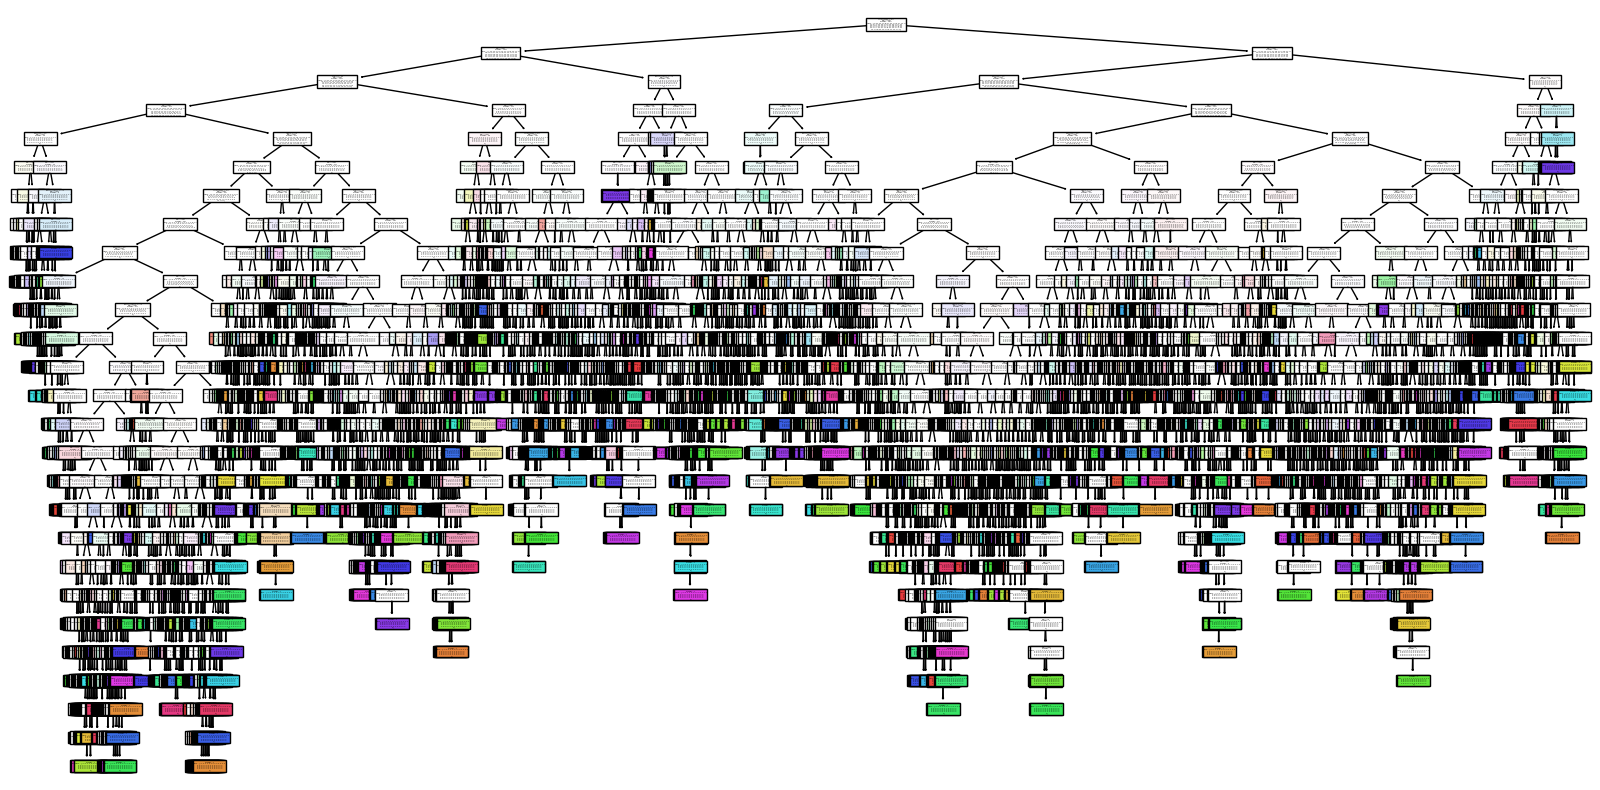

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_initial_accuracy = rf_clf.score(X_test, y_test)
rf_initial_accuracy=rf_initial_accuracy*100
print(rf_initial_accuracy)

1.5333333333333332


In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracySVM = accuracy_score(y_test, y_pred)*100
print('SVM Accuracy: ', accuracySVM)

SVM Accuracy:  1.7333333333333332


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracyKNN = accuracy_score(y_test, y_pred)*100
print('KNN Accuracy: ', accuracyKNN)

KNN Accuracy:  1.2666666666666666


In [ ]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracyGBC = accuracy_score(y_test, y_pred)*100
print('Gradient Boosting Accuracy: ',accuracyGBC)

Gradient Boosting Accuracy:  1.6666666666666667


In [ ]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracySVR = 100 - mape

print(f'Accuracy: {accuracySVR:.2f}%')

Accuracy: 88.90%


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracyLN = 100 - mape
print(f'Accuracy: {accuracyLN:.2f}%')

Accuracy: 88.90%


In [ ]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gb_model.predict(X_test)

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracyGradientBoostingRegressor = 100 - mape

print(f'Accuracy: {accuracyGradientBoostingRegressor:.2f}%')

Accuracy: 88.90%


In [ ]:
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 7
[LightGBM] [Info] Start training from score 164.705714


LGBMRegressor()

In [ ]:
y_pred = lgb_reg.predict(X_test)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

accuracyLGBMRegressor = 100 - mean_absolute_percentage_error(y_test, y_pred)
print(f"Accuracy: {accuracyLGBMRegressor:.2f}%")

Accuracy: 88.90%


In [ ]:
def compare_algorithms_accuracy(df, feature_cols, test_size=0.2, random_state=42):
    allAcc = {'Logistic Regression Accuracy': accuracy_log_reg,
      'Random Forest Classifier Accuracy': rf_initial_accuracy,
      'Decision Tree Accuracy': accuracyDecesionTree,
      'KNN accuracy':accuracyKNN,
      'SVM accuracy':accuracySVM,
      'Gradient Boosting Accuracy: ':accuracyGBC,
      'accuracy SVR':accuracySVR,
      'LinearRegression aaccuracy': accuracyLN,
      'GradientBoostingRegressor accuracy':accuracyGradientBoostingRegressor,
      'LGBMRegressor accuracy':accuracyLGBMRegressor,}

    highest_accuracy = max(allAcc, key=allAcc.get)
    return f"The algorithm with the highest accuracy is: {highest_accuracy} with an accuracy of {allAcc[highest_accuracy]:.2f}%"
result = compare_algorithms_accuracy(df, feature_cols)
print(result)

The algorithm with the highest accuracy is: accuracy SVR with an accuracy of 88.90%


In [ ]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)